# Data Bootcamp Final Project:
## The Significance of Foreign Talent and its Effects on the US Economic Performance 
### By Itihaas Kommanavancha, Jing Tan, Jonathan Wu

## Introduction

This project will study and analyze the change in certified/denied foreign worker petitions based on the occupation and the US economic sectors that relates to said occupation. The inspiration behind this project is the recent executive order by President Trump to freeze and suspend immigration over the course of 60 days to preserve and protect the U.S. Labor Market for US citizens. Also, this will help shed the everlasting question of “Who is stealing our jobs?” and “What jobs are being stolen?”. The basis of the project is based on data of US Permanent Visa Applications and the performance of different S&P500 sectors over the course of four years.

### What We Hope to Cover 

What we hope to cover?

1.	Organizing the US Permanent Visa Application Data and compare and visual initial data and general statistics of how many visas are being certified from which country, the type of jobs that are being certified, and which locations and companies are hiring the most amount of foreign talent.

2.	What impact does the change in various economic sectors have on the success rate of being certified for a U.S work visa? What type of job profiles have the highest number of approvals?

3.	What type of jobs have the most impact in the change of the economic performance of its specific sector?


*Data covers 2012-2017


#### Importing Packages and Necessary Data

In [1]:
#packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import statsmodels.formula.api as smf 
%matplotlib inline 
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as reg
import datetime
import seaborn as sns

import os                       # operating system tools (check files)
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools

#### Importing SP500 data by sector 

In [2]:
Communications = pd.read_csv('Communications1.csv')
Consumer_Discretionary = pd.read_csv('Consumer_Discretionary1.csv')
Consumer_Staples = pd.read_csv('Consumer_Staples1.csv')
Energy = pd.read_csv('Energy1.csv')
Financials = pd.read_csv('Financials1.csv')
Health_Care = pd.read_csv('Health_Care1.csv')
Industrials = pd.read_csv('Industrials1.csv')
Information_Technology = pd.read_csv('Information_Technology1.csv')
Materials = pd.read_csv('Materials1.csv')
Real_Estate = pd.read_csv('Real_Estate1.csv')
Utilities = pd.read_csv('Utilities1.csv')
Sectors = [Communications, Consumer_Discretionary, Consumer_Staples, Energy, Financials, Health_Care, Industrials, Information_Technology, Materials, Real_Estate, Utilities]

### Here we imported S&P 500 perfomance data by sector from 2011-2016

In [3]:
for i in Sectors:
    i["Year"] = i["Effective date "].str[-4:]
    #i["Return"] = (i["Price"]-i["Price"].shift(1))/i["Price"].shift(-1)
    i["Date"] = pd.to_datetime(i["Effective date "])

In [53]:
Communications = Communications.loc[189:888]
Communications = Communications.loc[Communications['Date'].isin(jobs["decision_date"])]
Consumer_Discretionary = Consumer_Discretionary.loc[189:888]
Consumer_Discretionary = Consumer_Discretionary.loc[Consumer_Discretionary['Date'].isin(jobs["decision_date"])]
Consumer_Staples = Consumer_Staples.loc[189:888]
Consumer_Staples = Consumer_Staples.loc[Consumer_Staples['Date'].isin(jobs["decision_date"])]
Energy = Energy.loc[189:888]
Energy = Energy.loc[Energy['Date'].isin(jobs["decision_date"])]
Financials = Financials.loc[189:888]
Financials = Financials.loc[Financials['Date'].isin(jobs["decision_date"])]
Health_Care = Health_Care.loc[189:888]
Health_Care = Health_Care.loc[Health_Care['Date'].isin(jobs["decision_date"])]
Industrials = Industrials.loc[189:888]
Industrials = Industrials.loc[Industrials['Date'].isin(jobs["decision_date"])]
Information_Technology = Information_Technology.loc[189:888]
Information_Technology = Information_Technology.loc[Information_Technology['Date'].isin(jobs["decision_date"])]
Materials = Materials.loc[189:888]
Materials = Materials.loc[Materials['Date'].isin(jobs["decision_date"])]
Real_Estate = Real_Estate.loc[189:888]
Real_Estate = Real_Estate.loc[Real_Estate['Date'].isin(jobs["decision_date"])]
Utilities = Utilities.loc[189:888]
Utilities = Utilities.loc[Utilities['Date'].isin(jobs["decision_date"])]



### Because the two data sets (immigration and S&P 500) do not match correctly, we want to find all the S&P dates that are also in the immigration dates so we can have the same number of rows between the two datasets. Immigration is the larger data set, thus that is where we set our .isin. Having matching rows between datasets will allow us to run regression analysis between them.

In [57]:
Financials

,Effective date,Price,Year,Date
189,10/3/2011,151.85,2011,2011-10-03
190,10/4/2011,158.08,2011,2011-10-04
191,10/5/2011,159.98,2011,2011-10-05
192,10/6/2011,165.14,2011,2011-10-06
193,10/7/2011,159.08,2011,2011-10-07
195,10/11/2011,167.15,2011,2011-10-11
196,10/12/2011,171.61,2011,2011-10-12
197,10/13/2011,167.53,2011,2011-10-13
198,10/14/2011,169.90,2011,2011-10-14
199,10/17/2011,164.22,2011,2011-10-17


### Importing Immigration Data

### Indexing for number of jobs per year, prep for regression for components of each sector

In [5]:
df = pd.read_csv('us_perm_visas.csv', low_memory = False)
unfiltered = pd.read_csv('us_perm_visas.csv', low_memory = False)

df = df[['agent_city', 'agent_state','application_type' , 'case_received_date', 'case_status', 'class_of_admission', 
        'country_of_citizenship', 'country_of_citzenship', 'decision_date','employer_city','employer_name','employer_postal_code',
       'employer_state','foreign_worker_info_alt_edu_experience','foreign_worker_info_birth_country','foreign_worker_info_city',
        'foreign_worker_info_education', 'foreign_worker_info_education_other','foreign_worker_info_inst',
        'foreign_worker_info_major','foreign_worker_info_postal_code','foreign_worker_info_rel_occup_exp'
        ,'foreign_worker_info_req_experience', 'job_info_job_title','us_economic_sector']]

df = df.loc[(df["case_status"] == "Certified") | (df["case_status"] == "Certified-Expired")]
df = df.sort_values('decision_date',ascending = True)
df["Year"] = df["decision_date"].str[0:4]
df

,agent_city,agent_state,application_type,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_city,...,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,job_info_job_title,us_economic_sector,Year
5776,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,CHINA,2011-10-03,BINGHAMTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Services,2011
7313,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,INDIA,2011-10-03,EDISON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,2011
6123,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,INDIA,2011-10-03,BELLEVUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
5293,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,INDIA,2011-10-03,MUNCIE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health Care,2011
2743,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,HUNGARY,2011-10-03,REDWOOD CITY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,2011
5285,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,INDIA,2011-10-03,DUBLIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,2011
7815,NaN,NaN,PERM,NaN,Certified-Expired,E-2,NaN,ITALY,2011-10-03,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transportation,2011
4605,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,SOUTH KOREA,2011-10-03,TUSCALOOSA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Services,2011
1489,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,COLOMBIA,2011-10-03,ATLANTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,2011
980,NaN,NaN,PERM,NaN,Certified-Expired,H-1B,NaN,CHINA,2011-10-03,DUBLIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,2011


### Original dataset included many more columns and thus we are only keeping the ones that we feel are needed. We also identified the applications that were certified to see what kind of labor is actually entering the U.S. Please note that certified includes certified and certified expired as certified expired means that applicants were accepted but applicant did not file to USCIS in time. However, often this is a result of technical/logistic difficulties and is most typically not a problem if applicant refiles.

In [6]:
econ_sector = df["us_economic_sector"].to_frame()
econ_sector["us_economic_sector"].unique()

array(['Educational Services', 'IT', nan, 'Health Care', 'Transportation',
       'Other Economic Sector', 'Advanced Mfg', 'Retail', 'Finance',
       'Aerospace', 'Hospitality', 'Construction', 'Energy', 'Automotive',
       'Agribusiness', 'Biotechnology', 'Geospatial', 'Homeland Security'],
      dtype=object)

### Identifying the unique sectors in the immigration data set

In [7]:
econ_sector.dropna()
econ_sector.groupby("us_economic_sector")["us_economic_sector"].agg("count")

us_economic_sector
Advanced Mfg             16505
Aerospace                 3674
Agribusiness               542
Automotive                 933
Biotechnology              424
Construction               951
Educational Services      7624
Energy                     977
Finance                   8289
Geospatial                 129
Health Care               5842
Homeland Security           64
Hospitality               1192
IT                       45276
Other Economic Sector    13065
Retail                    3899
Transportation             797
Name: us_economic_sector, dtype: int64

In [8]:
tot_jobs = df.loc[(df["Year"].str.contains('2011')) | (df["Year"].str.contains('2012')) | (df["Year"].str.contains('2013')) | (df["Year"].str.contains('2014')),:]
tot_jobs = tot_jobs.shape[0]
tot_jobs

130088

### Visualizing Some Immigration Data

##### Number Of Visas Certified, Withdrawn, or Denied

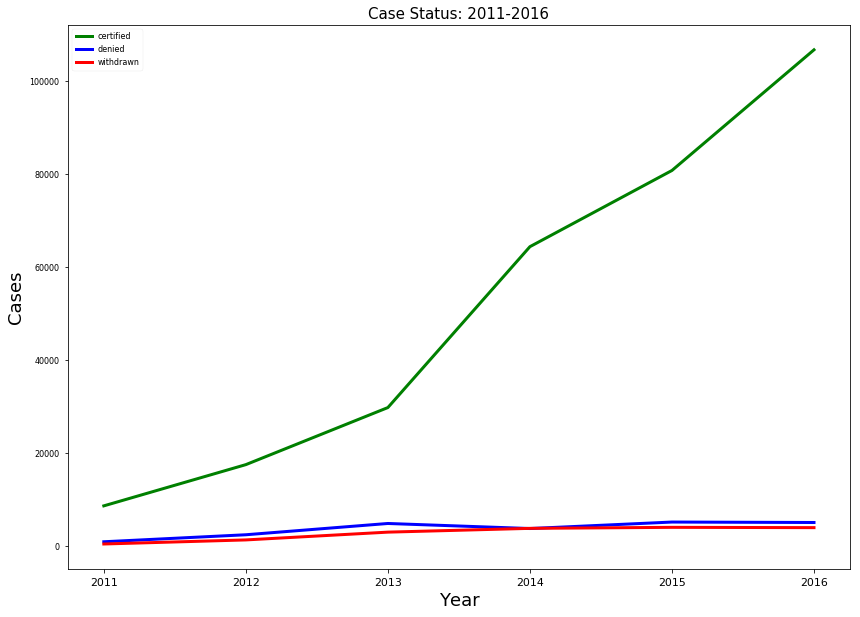

In [85]:
year = list(range(2011,2017))
certified = [8688,17551,29820,64402,80782,106720]
denied = [971,2477,4901,3815,5209,5112]
withdrawn = [492,1366,3040,3852,4071,4007]

graph = pd.DataFrame({'certified': certified, 'denied': denied, 'withdrawn': withdrawn}, index=year)
graph

fig,ax = plt.subplots()
graph['certified'].plot(ax=ax,color='g',linewidth = 3)
graph['denied'].plot(ax=ax,color='b', linewidth = 3)
graph['withdrawn'].plot(ax=ax,color='red', linewidth = 3)
fig.set_size_inches(14, 10)
ax.set_title('Case Status: 2011-2016',size=15,color='black')
ax.set_ylabel('Cases',size=18)
ax.set_xlabel('Year',size=18)
ax.legend()

### Number of denied, certified, withdrawn applicants between 2011-2016 were summed up. *Tables in appendix.

### In line with our initial hypothesis, this graph shows an increasing number of certified immigrants entering the U.S. Interestingly, the ratio between certified and denied applicants is decreasing, which suggests that certified rate of applicants is increasing. This follows our hypothesis that we see increase in number of certified visa applicants during economic expansions.

##### Top 10 Immigrant Destinations

In [10]:
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(10)

NEW YORK           16303
COLLEGE STATION    11781
SANTA CLARA         9889
SAN JOSE            8870
REDMOND             8389
MOUNTAIN VIEW       8040
HOUSTON             6196
SAN FRANCISCO       6158
SUNNYVALE           5886
CHICAGO             5301
Name: employer_city, dtype: int64

[Text(0,0.5,'Number of Certified Visas'),
 Text(0.5,0,'City'),
 Text(0.5,1,'Top Immigrant Destinations')]

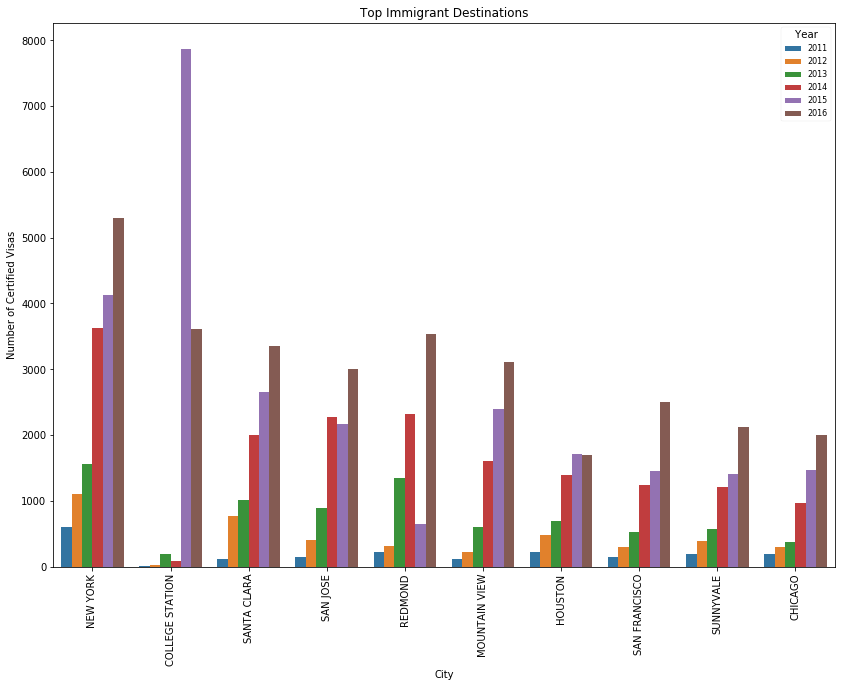

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='Year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='City', ylabel='Number of Certified Visas', title = "Top Immigrant Destinations")

### Graph shows that majority jobs immigrants have are clustered around large cities with tech focus. 

##### Where Certified Immigrants End up Working

[Text(0,0.5,'Number of Certified Visas'),
 Text(0.5,0,'Employer name'),
 Text(0.5,1,'Who Immigrants Are Employed By')]

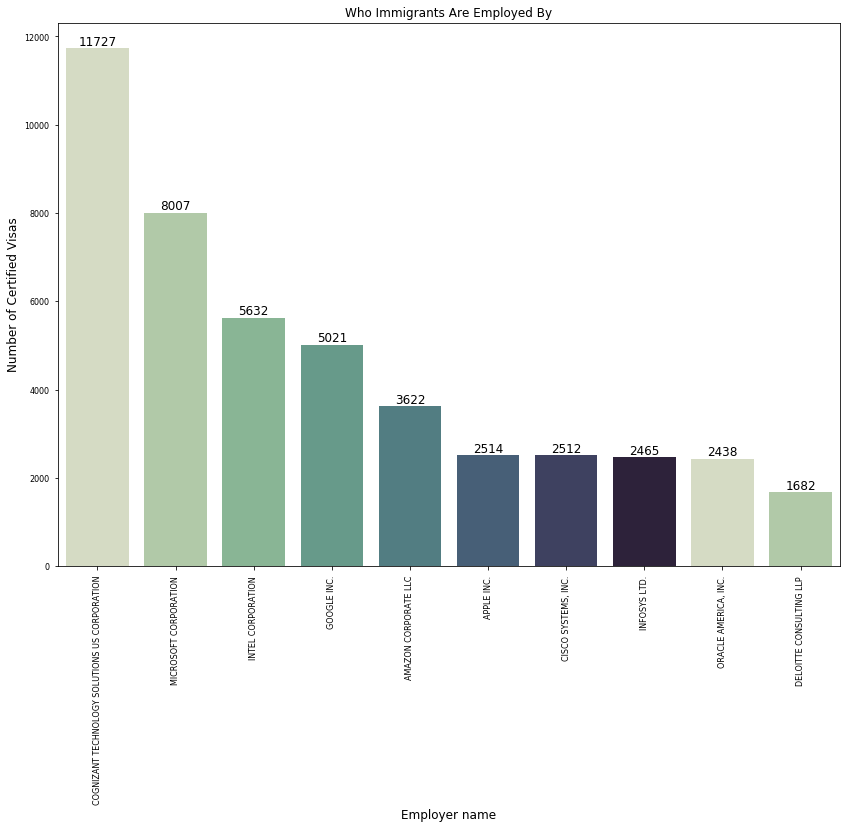

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

for i, v in df.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Certified Visas', title = 'Who Immigrants Are Employed By')

### In line with the "Top immigrant destinations" graph, this graph shows that most immigrants are being employed by large tech firms.

##### What Jobs Immigrants Are Getting

In [13]:
df['job_info_job_title'] = df['job_info_job_title'].str.lower()
df['job_info_job_title'] = df['job_info_job_title'].str.capitalize()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)

[Text(0,0.5,'Number Certified Visas'),
 Text(0.5,0,'Job Title'),
 Text(0.5,1,'Job Titles of Immigrants')]

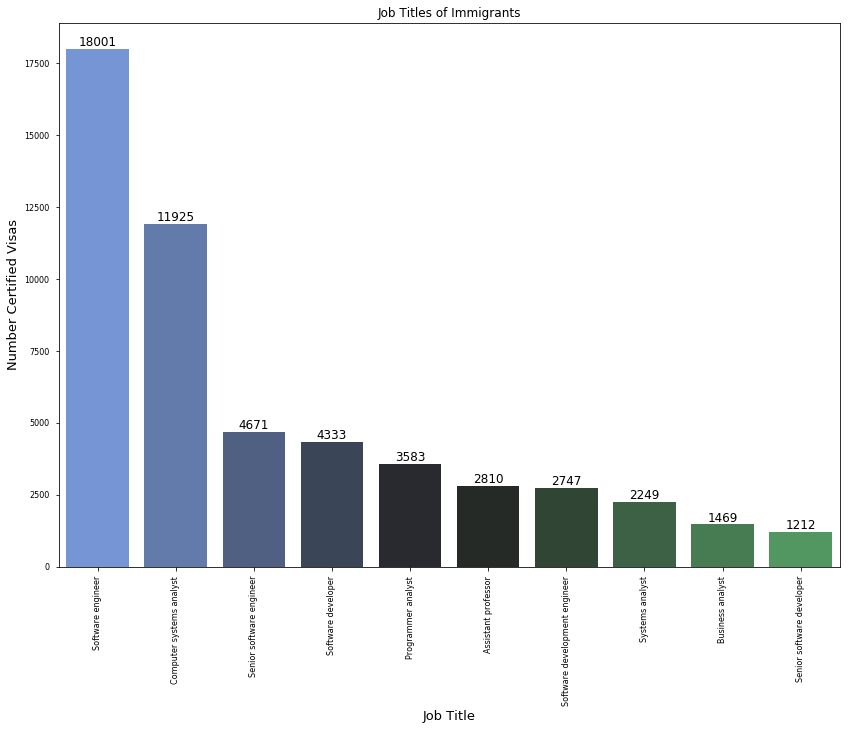

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.countplot(x='job_info_job_title',data=df, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

for i, v in df.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

ax.set(xlabel='Job Title', ylabel='Number Certified Visas', title = "Job Titles of Immigrants")


### This graph shows that the majority of immigrants are entering the U.S. workforce to work in tech jobs, which falls in line with our previous analysis that they are predominantly employed in large, tech focused cities and by tech firms.

##### Where Are Immigrants Coming From

[Text(0,0.5,'Number of Certified Visas'),
 Text(0.5,0,'Country of citizenship'),
 Text(0.5,1,'Where Immigrants Are Coming From')]

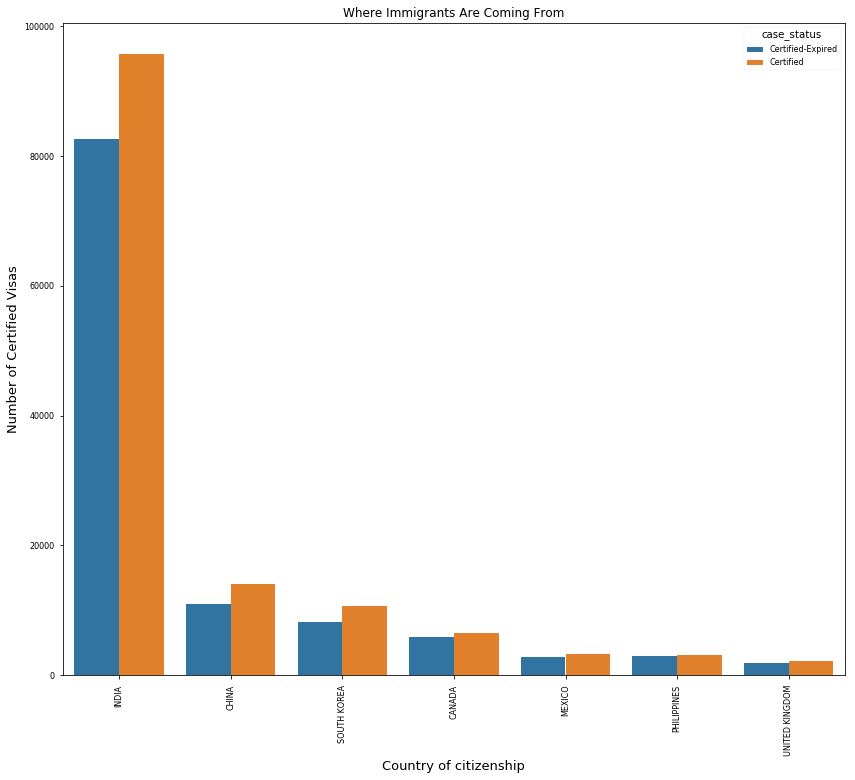

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df,  
              order=df.country_of_citizenship.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

ax.set(xlabel='Country of citizenship', ylabel='Number of Certified Visas', title = "Where Immigrants Are Coming From")

### India dominates the talent pool entering the U.S., with China and South Korea coming in second and third. This resonates with previous findings as these three nations are known for talents in the STEM field.

### For presentation purposes, we feel that separating certified and certified-expired into separate bars would make for a more presentatble graph as otherwise India would enlarge the y-axis to the extent where it will be difficult to tell apart the rest of the countries.

##### Breakdown of Immigrant Jobs Across US Economic Sector

([<matplotlib.patches.Wedge at 0x26320db7278>,
 [Text(-0.96611,0.493819,'Educational Services'),
  Text(-0.482904,-0.932365,'IT'),
  Text(0.902748,-0.536233,'Health Care'),
  Text(0.990056,-0.3497,'Transportation'),
  Text(1.04738,0.0741445,'Other Economic Sector'),
  Text(0.614423,0.85146,'Advanced Mfg'),
  Text(0.0223475,1.04976,'Retail'),
  Text(-0.349552,0.990108,'Finance'),
  Text(-0.67111,0.807534,'Aerospace'),
  Text(-0.780044,0.702874,'Hospitality')],
 [Text(-0.832546,0.425549,'7.2%'),
  Text(-0.413918,-0.79917,'42.6%'),
  Text(0.773784,-0.459628,'5.5%'),
  Text(0.848619,-0.299743,'0.8%'),
  Text(0.897753,0.0635525,'12.3%'),
  Text(0.526648,0.729823,'15.5%'),
  Text(0.019155,0.899796,'3.7%'),
  Text(-0.299616,0.848664,'7.8%'),
  Text(-0.575237,0.692172,'3.5%'),
  Text(-0.668609,0.602463,'1.1%')])

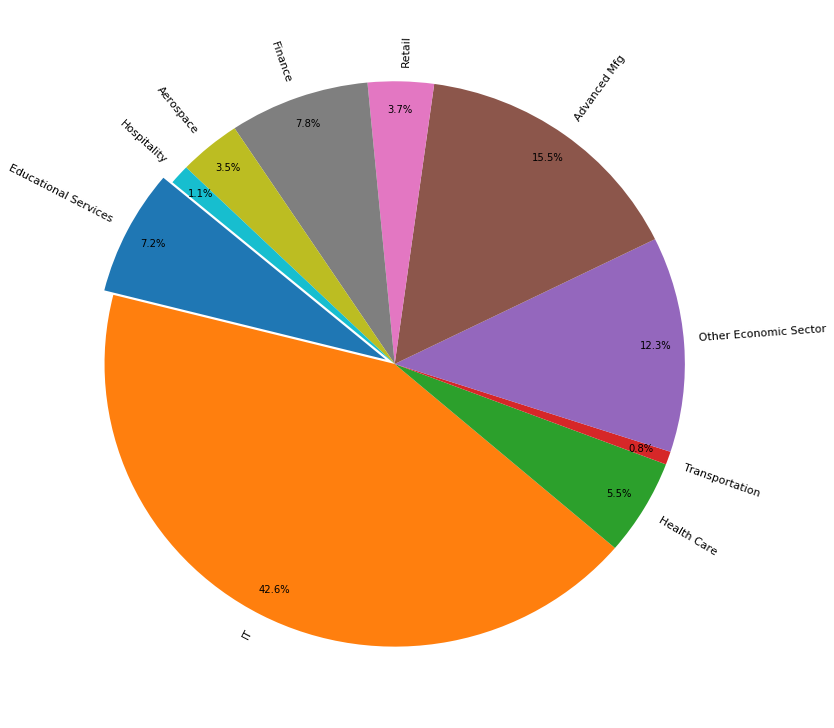

In [16]:
us_economic_counts = {}

for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1

usecolabels = []
usecovalues = []
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)
    
#Setting plot parameters
plt.figure(figsize=(13,13))    
sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05) 

### Above is a breakdown of immigrant jobs across economic sector in the U.S. I.T. sector covers slightly less than half which is inline with previous breakdowns.

###  How we grouped job types into the SP500 sectors for regression analysis

In [17]:
comm = ["IT","Advanced Mfg","Geospatial"]
cons_disc = ["Retail","Hospitality","Automotive"]
cons_staples = ["Educational Services","Transportation"]
energy = ["Energy","Advanced Mfg"]
financials = ["Finance", "IT"]
health_care = ["Biotechnology","Health Care"]
industrials = ["Construction", "Advanced Mfg","Aerospace"]
information_technology = ["IT","Homeland Security", "Geospatial"]
materials = ["Construction","Agribusiness"]
real_estate = ["Hospitality", "Homeland Security"]
utilities = ["Advanced Mfg","Energy","Utilities","Construction","Homeland Security"]

### Because the economic sectors in the immigration dataset did not match the S&P 500 sectors, we used our best judgment to group the sectors from immigration dataset so that it fits with S&P sectors. It was important that no S&P sector registers only one single sector from the immigration dataset as the sectors from immigration can be isn't exclusive to any particular sector in the S&P, which would then affect and skew our regression analysis

In [86]:
Communications

,Effective date,Price,Year,Date
189,10/3/2011,119.80,2011,2011-10-03
190,10/4/2011,120.46,2011,2011-10-04
191,10/5/2011,120.10,2011,2011-10-05
192,10/6/2011,120.77,2011,2011-10-06
193,10/7/2011,120.36,2011,2011-10-07
195,10/11/2011,121.68,2011,2011-10-11
196,10/12/2011,122.85,2011,2011-10-12
197,10/13/2011,123.63,2011,2011-10-13
198,10/14/2011,124.32,2011,2011-10-14
199,10/17/2011,123.43,2011,2011-10-17


### The chart belows shows dates that are found in both S&P 500 and immigration dataset. Note that this is a possible source of error as the data in this chart is only between 2011-2014. However, it was necessary that the dates match in order for the regression analysis to run.

### Separating the number of jobs by year

In [22]:
years = jobs["decision_date"].unique()


Aerospace_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Aerospace") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Aerospace_jobs.append(num_jobs)
    
Advanced_Mfg_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Advanced Mfg") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Advanced_Mfg_jobs.append(num_jobs)
    
Agribusiness_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Agribusiness") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Agribusiness_jobs.append(num_jobs)
    
Automotive_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Automotive") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Automotive_jobs.append(num_jobs)
    
Biotechnology_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Biotechnology") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Biotechnology_jobs.append(num_jobs)
    
Construction_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Construction") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Construction_jobs.append(num_jobs)
    
Educational_Services_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Educational Services") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Educational_Services_jobs.append(num_jobs)

Energy_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Energy") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Energy_jobs.append(num_jobs)
    
Finance_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Finance") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Finance_jobs.append(num_jobs)
    
Geospatial_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Geospatial") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Geospatial_jobs.append(num_jobs)
    
Health_Care_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Health Care") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Health_Care_jobs.append(num_jobs)
    
Homeland_Security_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Homeland Security") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Homeland_Security_jobs.append(num_jobs)
    
Hospitality_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Hospitality") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Hospitality_jobs.append(num_jobs)
    
IT_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "IT") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    IT_jobs.append(num_jobs)
    
Other_Economic_Sector_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Other Economic Sector") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Other_Economic_Sector_jobs.append(num_jobs)
      
Retail_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Retail") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Retail_jobs.append(num_jobs)
    
Transportation_jobs = []
for i in years:
    num_jobs = df.loc[(df["us_economic_sector"] == "Transportation") & (df["decision_date"].str.contains(i)),:]
    num_jobs = num_jobs.shape[0]
    Transportation_jobs.append(num_jobs)

### ^Here we seperate the number of jobs in each S&P sector by day through using a forloop. We have to clean it by day as the the S&P performance data is represented daily and this will allow the two data to match and be available for regression analysis. This will lead us into discovering the relationship between number of jobs in any given sector to that sectors performance.

In [58]:
Aerospace_jobs = Aerospace_jobs[0:545]
Advanced_Mfg_jobs = Advanced_Mfg_jobs[0:545]
Finance_jobs = Finance_jobs[0:545]
Educational_Services_jobs = Educational_Services_jobs[0:545]
IT_jobs = IT_jobs[0:545]
Health_Care_jobs = Health_Care_jobs[0:545]
Retail_jobs = Retail_jobs[0:545]
Other_Economic_Sector_jobs = Other_Economic_Sector_jobs[0:545]
Energy_jobs = Energy_jobs[0:545]
Construction_jobs = Construction_jobs[0:545]
Hospitality_jobs = Hospitality_jobs[0:545]
Transportation_jobs = Transportation_jobs[0:545]
Geospatial_jobs = Geospatial_jobs[0:545]
Biotechnology_jobs = Biotechnology_jobs[0:545]
Agribusiness_jobs = Agribusiness_jobs[0:545]
Automotive_jobs = Automotive_jobs[0:545]
Homeland_Security_jobs = Homeland_Security_jobs[0:545]

### Populating The Jobs DataFrame for Number of Jobs of Each Type

Once we found the number of different immigrant jobs initiated every day, we then created a data frame that would describe the immigrant jobs initiated across job type per day. By doing this, we were able to ensure that we could run a regression analysis of the relationship between sector price and number of immigrant jobs by type per day.

In [60]:
rows = len(df["decision_date"].unique())

jobs = pd.DataFrame(pd.np.empty((rows, 18)), columns = ['decision_date', 'Aerospace', 'Advanced Mfg', 'Finance', 'Educational Services',
       'IT', 'Health Care', 'Retail', 'Other Economic Sector', 'Energy', 'Construction', 'Hospitality', 'Transportation', 'Geospatial',
       'Biotechnology', 'Agribusiness', 'Automotive', 'Homeland Security'])

jobs["decision_date"] = df["decision_date"].unique()

In [61]:
jobs["Sector_date"] = Communications["Date"]
jobs = jobs.iloc[:545]

jobs["Aerospace"] = 0
jobs["Advanced Mfg"] = 0
jobs["Finance"] = 0
jobs["Educational Services"] = 0
jobs["IT"] = 0
jobs["Health Care"] = 0
jobs["Retail"] = 0
jobs["Other Economic Sector"] = 0
jobs["Energy"] = 0
jobs["Construction"] = 0
jobs["Hospitality"] = 0
jobs["Transportation"] = 0
jobs["Geospatial"] = 0
jobs["Biotechnology"] = 0
jobs["Agribusiness"] = 0
jobs["Automotive"] = 0
jobs["Homeland Security"] = 0

jobs

,decision_date,Aerospace,Advanced Mfg,Finance,Educational Services,IT,Health Care,Retail,Other Economic Sector,Energy,Construction,Hospitality,Transportation,Geospatial,Biotechnology,Agribusiness,Automotive,Homeland Security,Sector_date
0,2011-10-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
1,2011-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
2,2011-10-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
3,2011-10-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
4,2011-10-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
5,2011-10-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
6,2011-10-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
7,2011-10-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
8,2011-10-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
9,2011-10-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT


In [62]:
jobs["Aerospace"] = Aerospace_jobs[0:545]
jobs["Advanced Mfg"] = Advanced_Mfg_jobs[0:545]
jobs["Finance"] = Finance_jobs[0:550]
jobs["Educational Services"] = Educational_Services_jobs[0:545]
jobs["IT"] = IT_jobs[0:545]
jobs["Health Care"] = Health_Care_jobs[0:545]
jobs["Retail"] = Retail_jobs[0:545]
jobs["Other Economic Sector"] = Other_Economic_Sector_jobs[0:545]
jobs["Energy"] = Energy_jobs[0:545]
jobs["Construction"] = Construction_jobs[0:545]
jobs["Hospitality"] = Hospitality_jobs[0:545]
jobs["Transportation"] = Transportation_jobs[0:545]
jobs["Geospatial"] = Geospatial_jobs[0:545]
jobs["Biotechnology"] = Biotechnology_jobs[0:545]
jobs["Agribusiness"] = Agribusiness_jobs[0:545]
jobs["Automotive"] = Automotive_jobs[0:545]
jobs["Homeland Security"] = Homeland_Security_jobs[0:545]
jobs = jobs.iloc[:545]
jobs["Date"] = pd.to_datetime(jobs["decision_date"])

jobs = jobs.rename(columns={'Advanced Mfg': 'Advanced_Mfg'})
jobs = jobs.rename(columns={'Educational Services': 'Educational_Services'})
jobs = jobs.rename(columns={'Health Care': 'Health_Care'})
jobs = jobs.rename(columns={'Other Economic Sector': 'Other_Economic_Sector'})
jobs = jobs.rename(columns={'Homeland Security': 'Homeland_Security'})

jobs

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,decision_date,Aerospace,Advanced_Mfg,Finance,Educational_Services,IT,Health_Care,Retail,Other_Economic_Sector,Energy,Construction,Hospitality,Transportation,Geospatial,Biotechnology,Agribusiness,Automotive,Homeland_Security,Sector_date,Date
0,2011-10-03,5,8,4,23,48,10,5,20,0,1,1,2,0,0,0,0,0,NaT,2011-10-03
1,2011-10-04,7,21,10,10,42,2,5,18,2,0,0,1,0,0,0,0,0,NaT,2011-10-04
2,2011-10-05,3,24,7,26,72,15,4,20,2,0,1,1,0,0,1,2,0,NaT,2011-10-05
3,2011-10-06,5,23,14,14,70,5,6,28,0,3,2,2,0,1,0,1,0,NaT,2011-10-06
4,2011-10-07,7,30,20,30,106,11,5,32,3,1,0,2,0,2,1,4,0,NaT,2011-10-07
5,2011-10-11,4,14,7,21,50,6,3,16,1,2,2,1,0,2,0,2,0,NaT,2011-10-11
6,2011-10-12,5,19,8,18,56,8,5,27,2,1,0,2,1,0,0,3,0,NaT,2011-10-12
7,2011-10-13,11,35,29,38,132,17,3,40,5,4,1,3,0,1,1,2,0,NaT,2011-10-13
8,2011-10-14,13,21,18,10,91,10,5,30,1,3,2,2,0,1,0,3,0,NaT,2011-10-14
9,2011-10-17,6,26,15,2,82,10,7,18,2,4,0,1,0,2,0,1,0,NaT,2011-10-17


## Regression: Analyzing The Relationship Between S&P 500 Sectors and Different Immigrant Job Types

### General Methodology

To perform the regression analysis, we first categorized each immigrant job type to its respective S&P Sector(s). For example, for the Communications S&P 500 Sector, we categorized the immigrant jobs of IT, Advanced Manufacturing, and Geospatial jobs to  fit into this S&P 500 Sector. We followed a similar approach and exercised our judgement in categorizing the different immigrant jobs across the 11 S&P 500 Sectors.

Then, using the categorized immigrant jobs per S&P 500 Sector, we ran a regression analysis to understand which types of immigrant jobs affected the specific sector's price on a day by day basis - our dependent variable was the given S&P 500 Sector Price and our independent variables were the immigrant jobs that we categorized that fell under that S&P Sector. Again, using the Communications S&P 500 Sector as an example, our dependent variable was the price of the Communications Sector daily and our independent variables were the number of IT, Advanced Manufacturing, and Geospatial jobs initiated every day. 

Using the regression summary, we then plotted the jobs that were considered statistically significant (with p-values less than 0.05) in the regression next to the plot of the Sector's price over the same time frame. Our results are shown belw:

NOTE: It seems that there was missing data in all of our S&P Sector and Immigration data between the middle of 2012 and the beginnning of 2013. Therefore, these plots and analyses are not perfect indicators of the relationship between S&P Sector performance and the types of immigrant jobs initiated on any specific day. 

### Communications Sector Regression

In [63]:
comm = ["IT","Advanced Mfg","Geospatial"]

comm_price = Communications["Price"]

reg = smf.ols('comm_price ~ IT_jobs + Advanced_Mfg_jobs + Geospatial_jobs', Communications).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             comm_price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.590
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.40e-05
Time:                        15:44:31   Log-Likelihood:                -2151.6
No. Observations:                 545   AIC:                             4311.
Df Residuals:                     541   BIC:                             4328.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           144.2258      0.98

Text(0.5,1,'Number of IT Jobs')

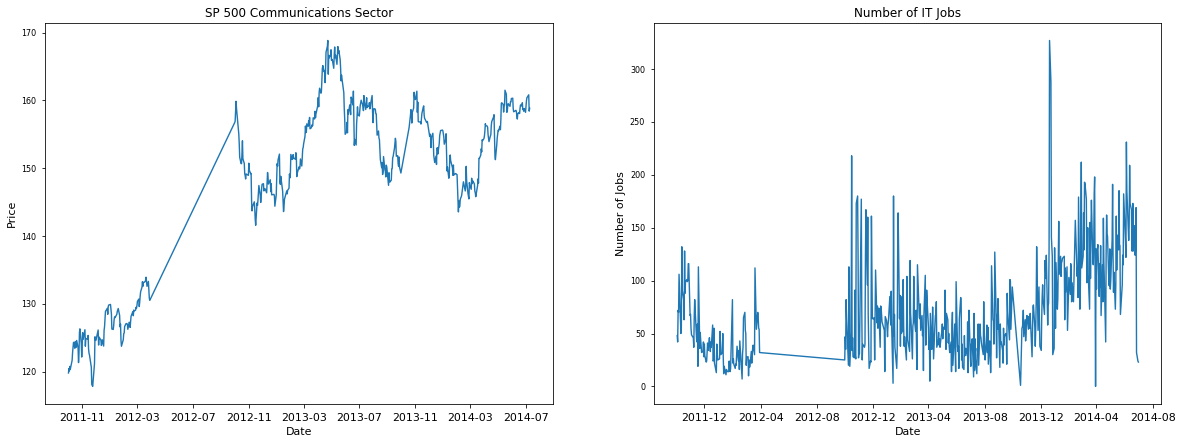

In [64]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Communications.Date,Communications.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Communications Sector")

ax[1].plot(jobs.Date ,jobs.IT)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of IT Jobs")

For the Communication Sector, immigrant IT jobs had a p-value that was statistically significant in the regression. In the plots, it is somewhat clear that there is a positive correlation in the number of IT jobs initiated and growth in the S&P 500 Communication Sector Price. 


### Consumer Discretionary Sector Regression

In [65]:
cons_disc = ["Retail","Hospitality","Automotive"]

cons_disc_price = Consumer_Discretionary["Price"]

reg = smf.ols('cons_disc_price ~ Retail_jobs + Hospitality_jobs + Automotive_jobs', Consumer_Discretionary).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        cons_disc_price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     30.83
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.06e-18
Time:                        15:44:37   Log-Likelihood:                -3096.9
No. Observations:                 545   AIC:                             6202.
Df Residuals:                     541   BIC:                             6219.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          406.8839      5.258  

Text(0.5,1,'Number of Hospitality Jobs')

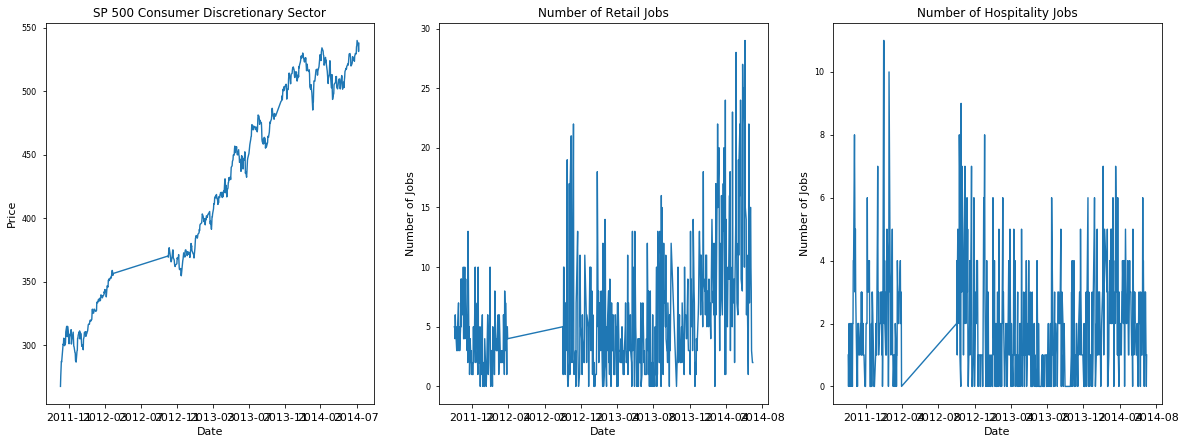

In [66]:
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,7))

ax[0].plot(Consumer_Discretionary.Date,Consumer_Discretionary.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Consumer Discretionary Sector")

ax[1].plot(jobs.Date ,jobs.Retail)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Retail Jobs")

ax[2].plot(jobs.Date ,jobs.Hospitality)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Number of Jobs")
ax[2].set_title("Number of Hospitality Jobs")

For the Consumer Discretionary Sector, immigrant Retail jobs and Hospitality jobs had p-values that were statistically significant in the regression. In the plots, it is somewhat clear that there is a positive correlation in the number of Retail and Hospitality jobs initiated and growth in the S&P 500 Consumer Discretionary Sector Price. This also makes sense because out of the immigrant job types that were specified, the nature of retail and hospitality jobs are as non essential jobs, justifying their position in the consumer discretionary sector. 

### Consumer Staples Sector Regression

In [67]:
cons_staples = ["Educational Services","Transportation"]

cons_staples_price = Consumer_Staples["Price"]

reg = smf.ols('cons_staples_price ~ Educational_Services_jobs + Transportation_jobs', Consumer_Staples).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:     cons_staples_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     13.21
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.50e-06
Time:                        15:44:43   Log-Likelihood:                -2834.2
No. Observations:                 545   AIC:                             5674.
Df Residuals:                     542   BIC:                             5687.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Text(0.5,1,'Number of Educational Services Jobs')

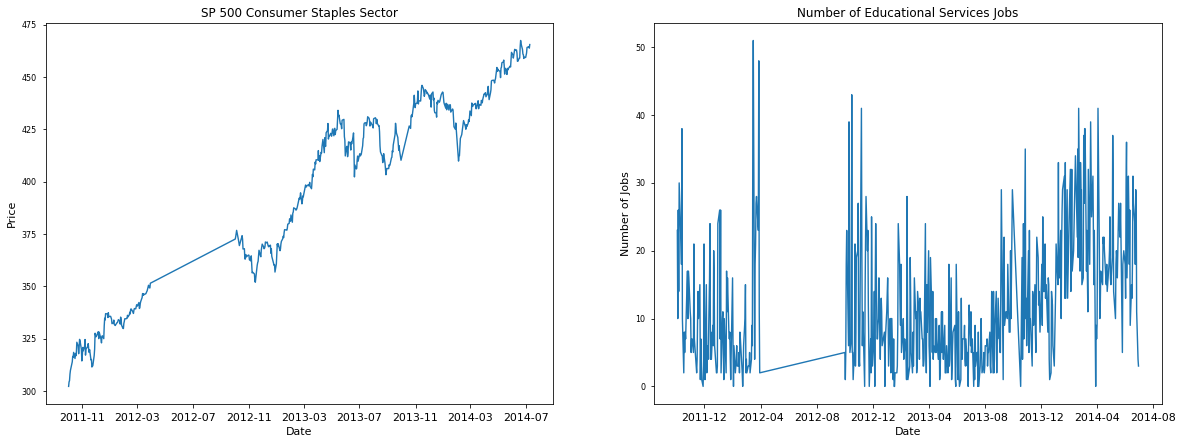

In [68]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Consumer_Staples.Date,Consumer_Staples.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Consumer Staples Sector")

ax[1].plot(jobs.Date ,jobs.Educational_Services)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Educational Services Jobs")

For the Consumer Staples Sector, immigrant Educational Services jobs had a p-value that was statistically significant in the regression. In the plots, it is somewhat unclear that there is a positive correlation in the number of Educational Services jobs initiated and growth in the S&P 500 Consumer Staples Sector Price. 

### Energy Sector Regression

In [69]:
energy = ["Energy","Advanced Mfg"]

energy_price = Energy["Price"]

reg = smf.ols('energy_price ~ Energy_jobs + Advanced_Mfg_jobs', Energy).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:           energy_price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     35.72
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.67e-15
Time:                        15:44:48   Log-Likelihood:                -2951.7
No. Observations:                 545   AIC:                             5909.
Df Residuals:                     542   BIC:                             5922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           567.2503      3.71

Text(0.5,1,'Number of Advanced Manufacturing Jobs')

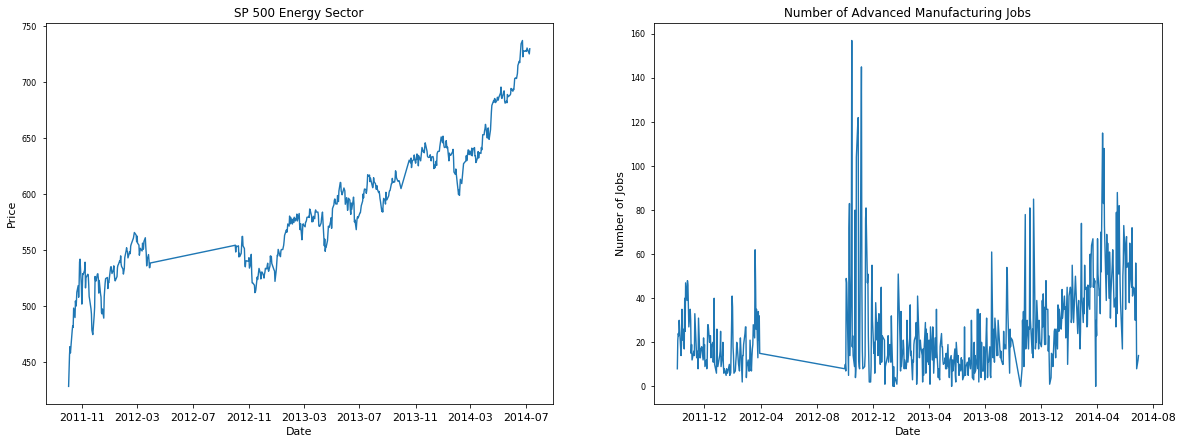

In [70]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Energy.Date,Energy.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Energy Sector")

ax[1].plot(jobs.Date ,jobs.Advanced_Mfg)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Advanced Manufacturing Jobs")

For the Energy Sector, immigrant Advanced Manufacturing jobs had a p-value that was statistically significant in the regression. In the plots, it is somewhat clear that there is a positive correlation in the number of Advanced Manufacturing jobs initiated and growth in the S&P 500 Energy Sector Price. This relationship makes sense because, even though there is missing data in the second half of 2012, it seems that the sector price dipped during this time and more advanced manufacturing jobs were initiated. 

### Financials Sector Regression

In [71]:
financials = ["Finance", "IT"]

fin_price = Financials["Price"]

reg = smf.ols('fin_price ~ Finance_jobs + IT_jobs', Financials).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              fin_price   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     62.26
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.59e-25
Time:                        15:44:51   Log-Likelihood:                -2771.1
No. Observations:                 545   AIC:                             5548.
Df Residuals:                     542   BIC:                             5561.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      219.9758      3.112     70.691   

Text(0.5,1,'Number of IT Jobs')

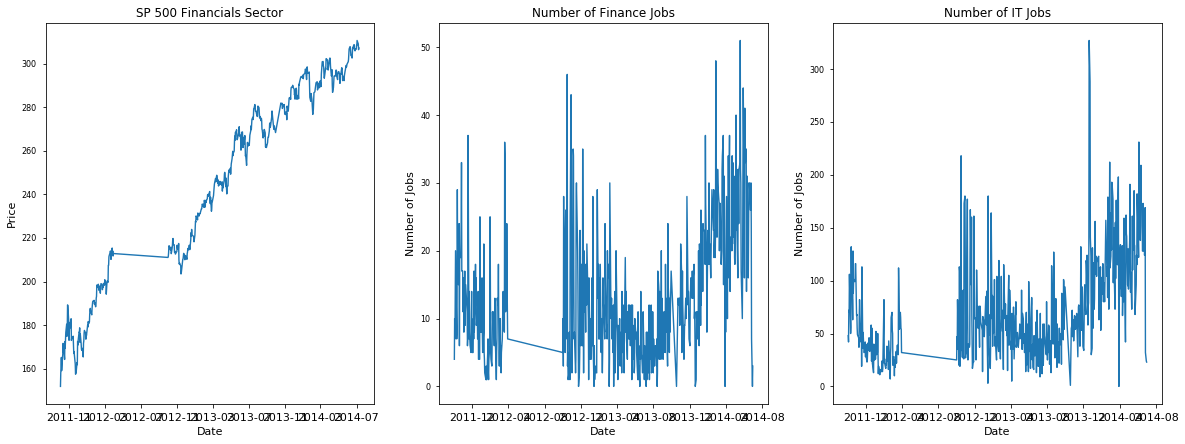

In [72]:

fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,7))

ax[0].plot(Financials.Date,Financials.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Financials Sector")

ax[1].plot(jobs.Date ,jobs.Finance)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Finance Jobs")

ax[2].plot(jobs.Date ,jobs.IT)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Number of Jobs")
ax[2].set_title("Number of IT Jobs")

For the Financials Sector, immigrant Finance and IT jobs had p-values that were statistically significant in the regression. In the plots, it is  clear that there is a positive correlation in the number of Finance and IT jobs initiated and growth in the S&P 500 Financials Sector Price. 

### Health Care Sector Regression

In [73]:
health_care = ["Biotechnology","Health Care"]

health_care_price = Health_Care["Price"]

reg = smf.ols('health_care_price ~ Biotechnology_jobs + Health_Care_jobs', Health_Care).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      health_care_price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     21.62
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.23e-10
Time:                        15:44:54   Log-Likelihood:                -3274.6
No. Observations:                 545   AIC:                             6555.
Df Residuals:                     542   BIC:                             6568.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            508.3443      6

Text(0.5,1,'Number of Biotechnology Jobs')

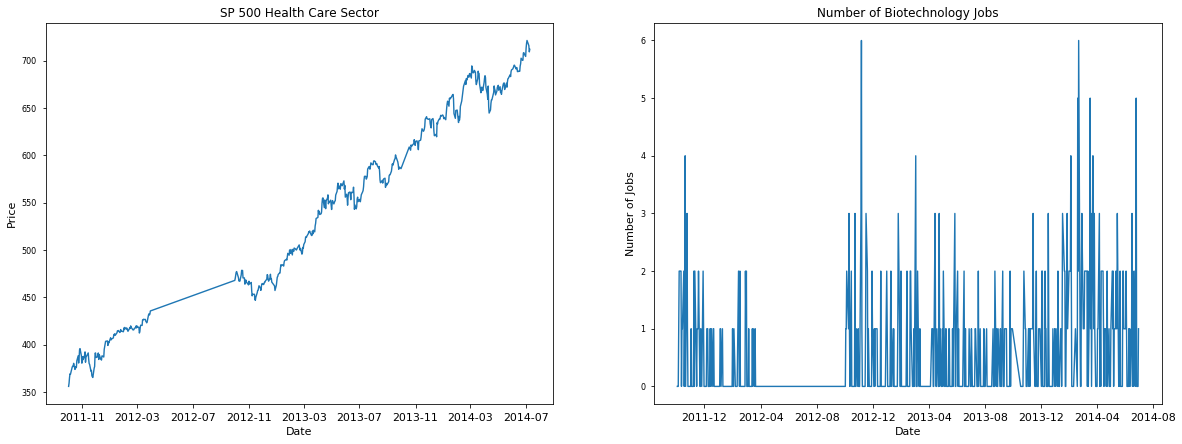

In [74]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Health_Care.Date,Health_Care.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Health Care Sector")

ax[1].plot(jobs.Date ,jobs.Biotechnology)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Biotechnology Jobs")

For the Health Care Sector, immigrant Biotechnology jobs had a p-value that was statistically significant in the regression. In the plots, it is somewhat clear that there is a positive correlation in the number of IT jobs initiated and growth in the S&P 500 Health Care Sector Price. Given that there were minimal immigrant biotechnology jobs initiated on a per day basis, it is hard to find a strong correlation between the two plots. 

### Industrials Sector Regression

In [75]:
industrials = ["Construction", "Advanced Mfg","Aerospace"]

industrials_price = Industrials["Price"]

reg = smf.ols('industrials_price ~ Construction_jobs + Advanced_Mfg_jobs + Aerospace_jobs', Industrials).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      industrials_price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     28.64
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.36e-17
Time:                        15:44:57   Log-Likelihood:                -2960.5
No. Observations:                 545   AIC:                             5929.
Df Residuals:                     541   BIC:                             5946.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           345.8531      4.08

Text(0.5,1,'Number of Aerospace Jobs')

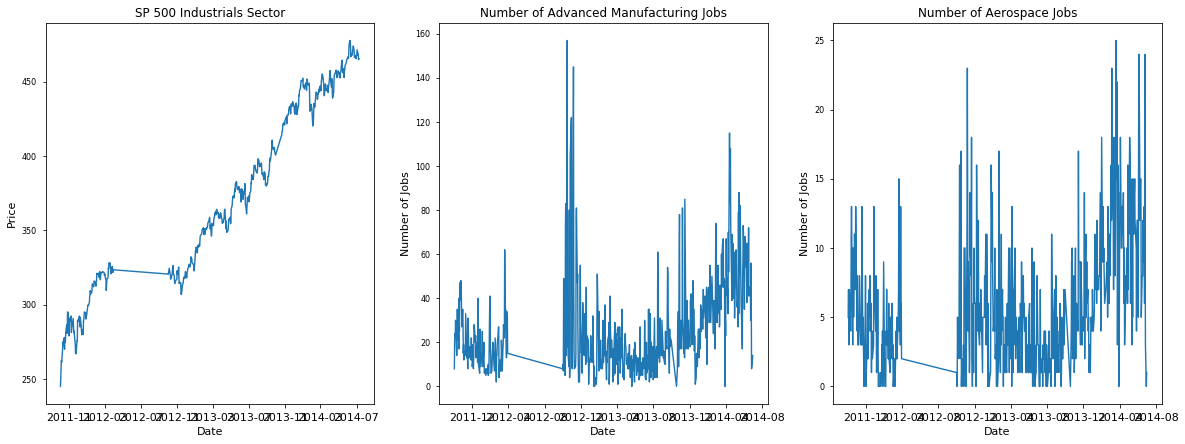

In [76]:

fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,7))

ax[0].plot(Industrials.Date,Industrials.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Industrials Sector")

ax[1].plot(jobs.Date ,jobs.Advanced_Mfg)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Advanced Manufacturing Jobs")

ax[2].plot(jobs.Date ,jobs.Aerospace)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Number of Jobs")
ax[2].set_title("Number of Aerospace Jobs")

For the Industrials Sector, immigrant Advanced Manufacturing and Aerospace jobs had p-values that were statistically significant in the regression. In the plots, it is  clear that there is a positive correlation in the number of Advanced Manufacturing and Aerospace jobs initiated and growth in the S&P 500 Industrials Sector Price.

### Information Technology Sector Regression

In [77]:
information_technology = ["IT","Homeland Security", "Geospatial"]

IT_price = Information_Technology["Price"]

reg = smf.ols('IT_price ~ IT_jobs + Homeland_Security_jobs + Geospatial_jobs', Information_Technology).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               IT_price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     74.06
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.81e-40
Time:                        15:45:00   Log-Likelihood:                -2941.8
No. Observations:                 545   AIC:                             5892.
Df Residuals:                     541   BIC:                             5909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                455

Text(0.5,1,'Number of IT Jobs')

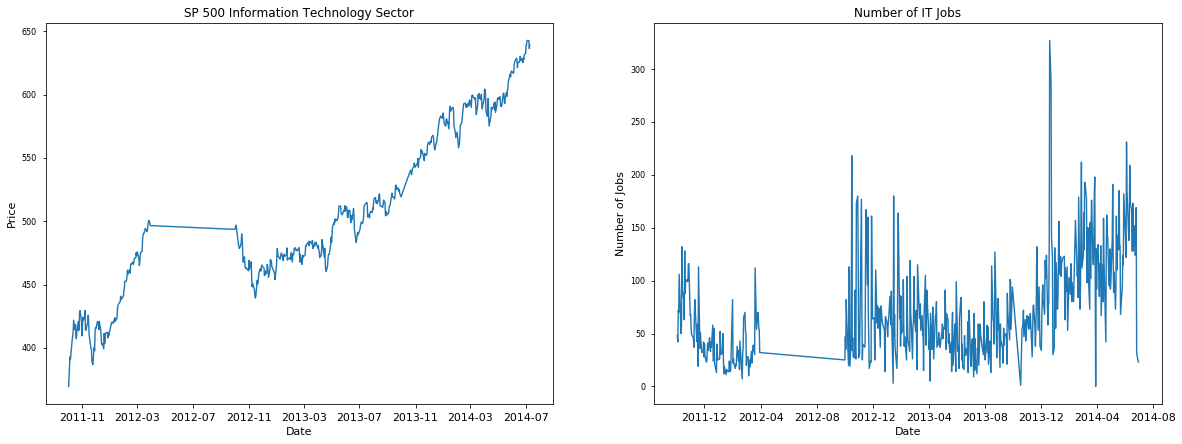

In [78]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Information_Technology.Date,Information_Technology.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Information Technology Sector")

ax[1].plot(jobs.Date ,jobs.IT)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of IT Jobs")

For the Information Technology Sector, immigrant IT jobs had a p-value that was statistically significant in the regression. In the plots, it is certainly clear that there is a positive correlation in the number of IT jobs initiated and growth in the S&P 500 Information Technology Sector Price and this makes sense given that the majority of the jobs in the Information Technology sector are most likely to be IT jobs. 

### Materials Sector Regression

In [79]:
materials = ["Construction","Agribusiness"]

materials_price = Materials["Price"]

reg = smf.ols('materials_price ~ Construction_jobs + Agribusiness_jobs', Materials).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        materials_price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     13.64
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.66e-06
Time:                        15:45:03   Log-Likelihood:                -2615.5
No. Observations:                 545   AIC:                             5237.
Df Residuals:                     542   BIC:                             5250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           249.9078      1.78

Text(0.5,1,'Number of Agribusiness Jobs')

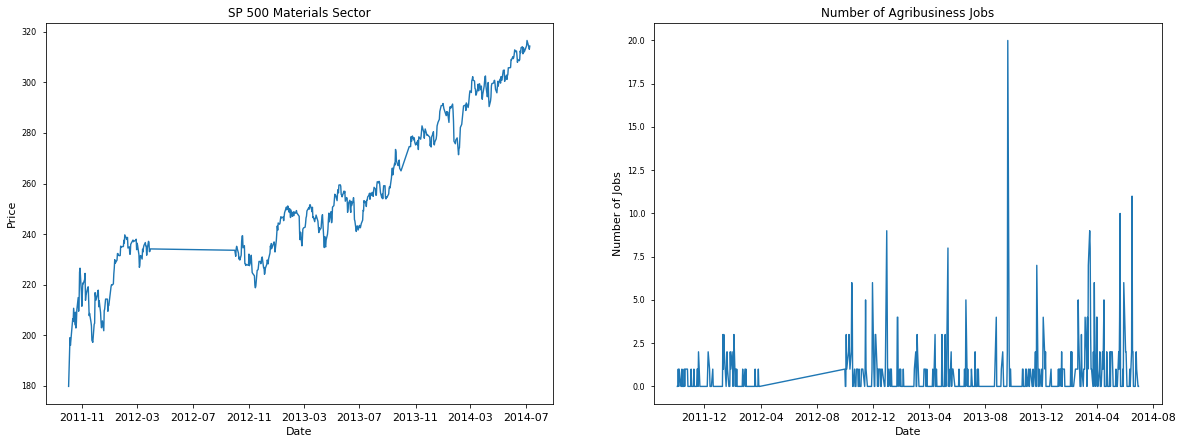

In [80]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Materials.Date,Materials.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Materials Sector")

ax[1].plot(jobs.Date ,jobs.Agribusiness)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Agribusiness Jobs")

For the Materials Sector, immigrant Agribusiness jobs had a p-value that was statistically significant in the regression. In the plots, it is somewhat unclear that there is a positive correlation in the number of Agribusiness jobs initiated and growth in the S&P 500 Materials Sector Price. Given that there are minimal Agribusiness jobs being initiated every day, there is not a clear correlation between the growth in the materials sector and the agribusiness jobs initiated even though the regression stated that agribusiness jobs had statistical significance.

### Real Estate Sector Regression

In [81]:
real_estate = ["Hospitality", "Homeland Security"]

real_estate_price = Real_Estate["Price"]

reg = smf.ols('real_estate_price ~ Hospitality_jobs + Homeland_Security_jobs', Real_Estate).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      real_estate_price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.599
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0280
Time:                        15:45:05   Log-Likelihood:                -2192.7
No. Observations:                 545   AIC:                             4391.
Df Residuals:                     542   BIC:                             4404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                151

Text(0.5,1,'Number of Homeland Security Jobs')

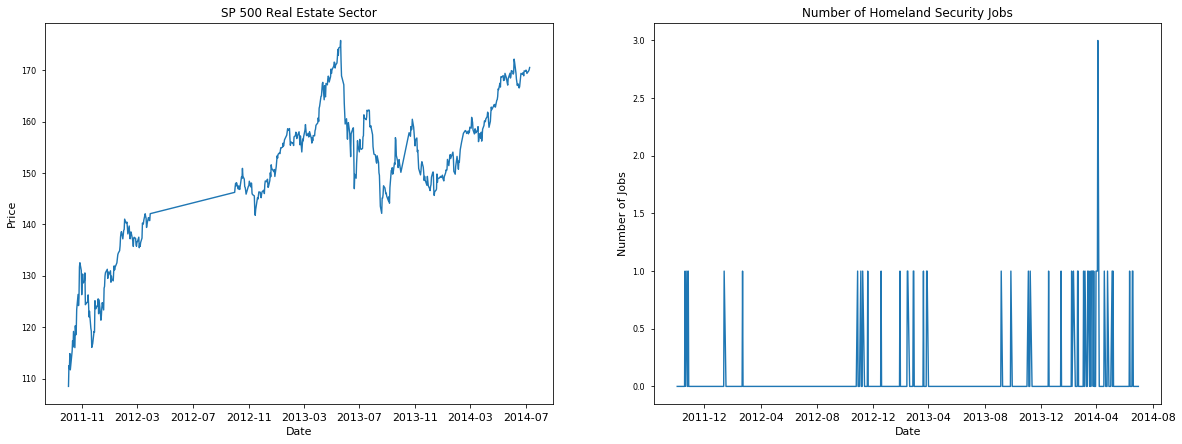

In [82]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

ax[0].plot(Real_Estate.Date,Real_Estate.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Real Estate Sector")

ax[1].plot(jobs.Date ,jobs.Homeland_Security)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Homeland Security Jobs")

For the Real Estate Sector, immigrant homeland security jobs had a p-value that was statistically significant in the regression. In the plots, it is unclear that there is a positive correlation in the number of homeland security jobs initiated and growth in the S&P 500 Real Estate Sector Price. With so few homeland securty jobs logged into the immigration data set, it is difficult to find a correlation, if any, between the growth in the real estate sector and the number of homeland security immigrant jobs initiated.

### Utilities Sector Regression

In [83]:
utilities = ["Advanced Mfg","Energy","Utilities","Construction","Homeland Security"]

utilities_price = Utilities["Price"]

reg = smf.ols('utilities_price ~ Advanced_Mfg_jobs + Energy_jobs + Construction_jobs + Homeland_Security_jobs', Utilities).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        utilities_price   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     20.01
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.21e-15
Time:                        15:45:09   Log-Likelihood:                -2152.8
No. Observations:                 545   AIC:                             4316.
Df Residuals:                     540   BIC:                             4337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                186

Text(0.5,1,'Number of Homeland Security Jobs')

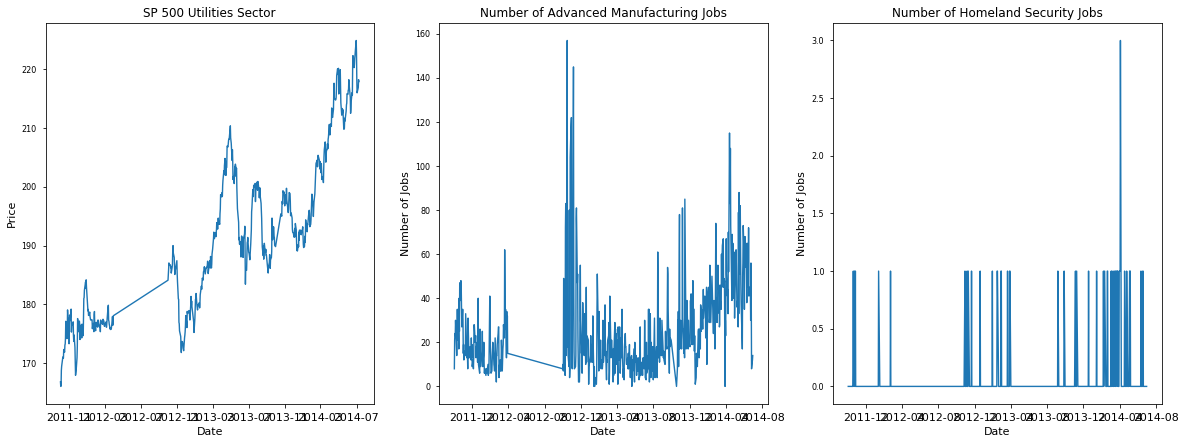

In [84]:
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,7))

ax[0].plot(Utilities.Date,Utilities.Price)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("SP 500 Utilities Sector")

ax[1].plot(jobs.Date ,jobs.Advanced_Mfg)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Jobs")
ax[1].set_title("Number of Advanced Manufacturing Jobs")

ax[2].plot(jobs.Date ,jobs.Homeland_Security)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Number of Jobs")
ax[2].set_title("Number of Homeland Security Jobs")

For the Utilities Sector, immigrant Advanced Manufacturing and Homeland Security jobs had p-values that were statistically significant in the regression. In the plots, it is somewhat clear that there is a positive correlation in the number of Advanced Manufacturing and Homeland Security jobs initiated and growth in the S&P 500 Utilities Sector Price. There is potentially a correlation between these two job types and the growth in the utilities sector, but given that there are minimal homeland security initiated jobs, the homeland security job variable may not be the best measure of correlation with the growth in the utilities sector.

Conclusion:

- 

Our findings show that S&P price over the years (2011-2016), despite showing statistical significance in the P-values in several sectors, doesn't show a clear correlation between immigrant job types and U.S. economic performance by sector. Part of this can be attributed to the fact that U.S. economy is impacted and shaped by many different variables and immigrant job types is only one of factors, not the factor. Another confounding variable to our findings is that the dataset had missing values at random spots which forced us to clean the data accordingly and that possibly could have led to us missing out on important data under other columns/rows. We believe that if a more complete dataset was available regarding this topic, we would be able to conclude our findings with greater confidence. Nevertheless, the model that we have applied in this project can be applied broadly. 